In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df = df.rename(columns={
    '3.159499363321345566e-02': 'x',
    '9.869877579082642072e-01': 'y',
    '0.000000000000000000e+00': 'class'
})
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


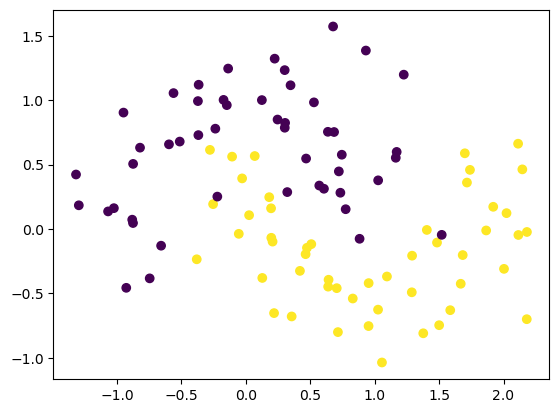

In [6]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [1]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

NameError: name 'df' is not defined

In [10]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.get_weights()

[array([[ 0.35489327,  0.13212311, -0.6892839 ,  0.249434  ,  0.46307033,
         -0.22937614,  0.05936706,  0.5937149 ,  0.4527362 , -0.24849477],
        [-0.70065844,  0.6915141 ,  0.03592515,  0.46255308,  0.10195321,
         -0.3083116 , -0.38146892, -0.0277648 , -0.63128495, -0.14042771]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.29738933, -0.5331528 ,  0.05730236, -0.27762547,  0.21392566,
          0.27270353, -0.12134257,  0.26424146,  0.00202531,  0.10824388],
        [-0.29231796, -0.35153863, -0.12318191,  0.48089767, -0.03168154,
          0.12254673, -0.24116185,  0.46680093, -0.00734198,  0.48961604],
        [-0.228892  , -0.05388814, -0.03437895,  0.2682054 ,  0.1273002 ,
         -0.33184934, -0.5052081 , -0.35018772,  0.05589342, -0.16952053],
        [-0.34500444, -0.15845194,  0.2104984 ,  0.02947849, -0.28690344,
         -0.34497702,  0.38256878, -0.04959363, -0.16805336,  0.24467754],
        [-0.41794

In [12]:
initial_weights = model.get_weights()

In [20]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape) # here it bias 
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [14]:
model.set_weights(initial_weights)

In [15]:
model.get_weights()

[array([[-0.10220038, -1.472285  , -0.42605174,  0.39757055,  0.77418536,
          0.626222  ,  0.47476867,  0.07178798,  0.25549716, -0.735722  ],
        [-0.5220638 ,  1.423355  ,  0.02973431, -0.33490342, -0.16523263,
         -0.23655772,  0.16569902,  0.3250024 ,  0.7452502 ,  1.1122166 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.08740833,  0.2474396 , -0.2900728 , -0.11666216,  0.25758266,
          0.18163283,  0.43746388, -0.2825723 ,  0.26950032,  0.15533723],
        [-0.08570964, -0.36526677,  0.22875085,  0.26205322, -0.02559103,
          0.12478752,  0.51561165, -0.27412587,  0.06146539,  0.5280767 ],
        [-0.19876884, -0.06691093,  0.41720217, -0.08765711, -0.11741015,
         -0.16137138, -0.079566  , -0.09047532,  0.3176014 , -0.35684755],
        [ 0.74831206, -0.07346459,  0.01515307,  0.2959248 ,  0.9225067 ,
          0.57886153,  0.08088011,  0.05167896, -0.1772755 , -0.16772754],
        [-0.39334

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.7894 - loss: 0.6131 - val_accuracy: 0.8500 - val_loss: 0.5673
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7884 - loss: 0.5880 - val_accuracy: 0.8500 - val_loss: 0.5439
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8236 - loss: 0.5645 - val_accuracy: 0.8500 - val_loss: 0.5233
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8104 - loss: 0.5551 - val_accuracy: 0.8500 - val_loss: 0.5048
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7869 - loss: 0.5524 - val_accuracy: 0.8500 - val_loss: 0.4881
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8065 - loss: 0.5196 - val_accuracy: 0.8500 - val_loss: 0.4723
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8026 - loss: 0.5202 - val_accuracy: 0.8500 - val_loss: 0.4579
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8065 - loss: 0.5003 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 864us/step


<Axes: >

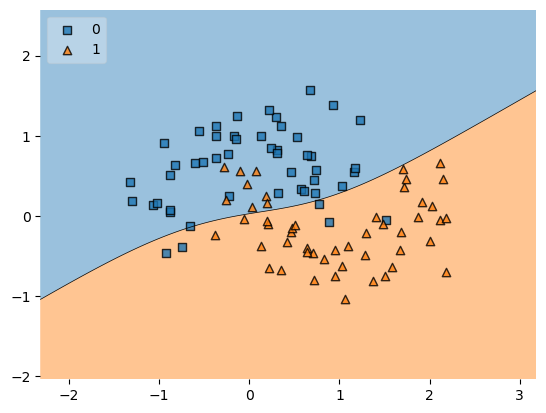

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)